In [132]:
import numpy as np
import pandas as pd
import random
import math
import matplotlib.pyplot as plt

#**Project 1: Tracing a Simulated Annealing Algorithm for an OR Gate**


##1.) Set up the algorithm

####**Initialize current configuration and determine next configuration**

In [229]:
# Determine next configuration and set as current.
def set_next_configuration(W_x, W_y, W_b, iteration):

  random_x = random.randint(-2, 2)
  random_y = random.randint(-2, 2)
  random_b = random.randint(-2, 2)

  W_xnew = W_x + random_x
  W_ynew = W_y + random_y
  W_bnew = W_b + random_b
  next_config = np.array([W_xnew, W_ynew, W_bnew])

  return next_config

####**Calculate all values for X and Y**

In [230]:
def set_X_Y_values(x, y, W_x, W_y, W_b):
  value = x * W_x + y * W_y + 1 * W_b


  return value

####**Calculate all *error* values for X and Y**

In [231]:
def calculate_error(truth_table_result, x_y_value):
  error = abs(truth_table_result - (1 / (1 + math.exp(- x_y_value))))

  return error

####**Set temperature schedule**

In [232]:
def create_temperature_schedule(temp_schedule_value, ratio, num_iterations):
  temp_schedule = np.zeros(num_iterations, dtype=float)
  temp_schedule[0] = float(temp_schedule_value)

  for i in range(1, num_iterations):
    temp_schedule[i] = temp_schedule[i - 1] / float(ratio)

  return temp_schedule

####**Calculate change in energy and P-value**

In [233]:
def calculate_change_in_energy(current_error_value, next_error_value):
  change_in_E = current_error_value - next_error_value

  return change_in_E

In [234]:
def calculate_P(delta_E, temperature):
  P_value = np.exp(delta_E / temperature)

  return P_value

####**Determine whether a configuration should be accepted/rejected**

In [235]:
def analyze_configuration(delta_E, P_value):
  random_value = random.uniform(0, 1)

  if delta_E > 0:
    return True

  elif delta_E <= 0 and P_value > random_value:
    return True

  elif P_value <= random_value:
    return False


####**Initialize number of iterations, configurations, and truth table**

In [236]:
# Number of iterations for simulated annealing and the OR gate.
iteration_count = 10

# The initial configuration of Wx, Wy, and Wb are all 0.
current_config = np.zeros((iteration_count + 1, 3), dtype="int64")

# OR gate X, Y, and result values.
truth_table = np.array([[0,0,0],
                        [0,1,1],
                        [1,0,1],
                        [1,1,1]])

####**Use one of 3 temperature schedules**

In [237]:
temp_schedule_start = 1.0000

temp_ratio = 1.05
#temp_ratio = 1.1
#temp_ratio = 1.2

temperature_schedule = create_temperature_schedule(temp_schedule_start, temp_ratio, iteration_count)

####**Initialize arrays for use in table and graphs**

In [238]:
x_y_values = np.zeros((iteration_count, 4), dtype="int64")
x_y_error_values = np.full((iteration_count, 4), 0.5, dtype="float")

error_values = np.zeros((iteration_count, 1), dtype="float")
p_values = np.zeros((iteration_count, 1), dtype="float")

delta_E = np.zeros((iteration_count, 1), dtype="float")

##2.) Run the algorithm

In [239]:
for i in range(iteration_count):
  print(f"Iteration {i} of {iteration_count}")
  accept_configuration = False                                                  # Used to break while-loop when an acceptable configuration is found.
  delta_E_value = 0

  while accept_configuration == False:
    # Create a configuration until the last iteration, since the last iteration will not need to use one.
    if i < iteration_count - 1:
      current_config[i + 1] = set_next_configuration(current_config[i][0], current_config[i][1], current_config[i][2], i)

    # Initialize to 0 because error values are accumulated and summed.
    error_values[i] = 0

    for j in range(4):
      # Calculate x and y values for all 4 parts of the OR truth table.
      x_y_values[i][j] = set_X_Y_values(truth_table[j][0], truth_table[j][1], current_config[i][0], current_config[i][1], current_config[i][2])

      # Calculate the error from the x/y values.
      x_y_error_values[i][j] = calculate_error(truth_table[j][2], x_y_values[i][j])

      error_values[i] += x_y_error_values[i][j]

    # Calculate change in energy and store values in array for DataFrame use.
    delta_E[i - 1][0] = calculate_change_in_energy(error_values[i - 1], error_values[i])
    delta_E_value = delta_E[i - 1][0].item()

    # Calculate p-values and store in array for DataFrame use.
    p_values[i - 1][0] = calculate_P(delta_E_value, temperature_schedule[i - 1])
    P_value = p_values[i - 1][0].item()



    # For the first iteration, simply break the while loop regardless of configuration to finish program and prevent infinite loop.
    if i == 0:
      accept_configuration = True
      break

    # Break loop if delta(E) > 0, or delta(E) <= but P > a random number.
    if i >=  1:
      accept_configuration = analyze_configuration(delta_E_value, P_value)
      if accept_configuration == True:
        break
      if accept_configuration == False:
        current_config[i] = current_config[i + 1]


print(f"Iteration {iteration_count} of {iteration_count}")

Iteration 0 of 10
Iteration 1 of 10
Iteration 2 of 10
Iteration 3 of 10
Iteration 4 of 10
Iteration 5 of 10
Iteration 6 of 10
Iteration 7 of 10
Iteration 8 of 10
Iteration 9 of 10
Iteration 10 of 10


/tmp/ipython-input-2413544835.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  delta_E[i - 1][0] = calculate_change_in_energy(error_values[i - 1], error_values[i])


##3.) Analyze the results

In [144]:
import matplotlib.pyplot

####**Show results in DataFrame table**

In [240]:
transposed_values = np.transpose(x_y_values)
transposed_error_values = np.transpose(x_y_error_values)

# For current configurations.
df_config = pd.DataFrame(current_config,columns=["Wx", "Wy", "Wb"])

# For temperature schedule.
df_temp = pd.DataFrame(temperature_schedule, columns=["Temp schedule"])

# For change in energy (delta E)
df_e = pd.DataFrame(delta_E, columns=["Change in E"])

# For p_values
df_p = pd.DataFrame(p_values, columns=["P value"])

# For X = 0 and Y = 0 (produces 0)
df_x1y1 = pd.DataFrame(transposed_values[0], columns=["X,Y = (0,0)"])
df_error1 = pd.DataFrame(transposed_error_values[0], columns=["Error (X,Y)"])

# For X = 0 and Y = 1 (produces 1)
df_x2y2 = pd.DataFrame(transposed_values[1], columns=["X,Y= (0,1)"])
df_error2 = pd.DataFrame(transposed_error_values[1], columns=["Error (X,Y)"])

# For X = 1 and Y = 0 (produces 1)
df_x3y3 = pd.DataFrame(transposed_values[2], columns=["X,Y= (1,0)"])
df_error3 = pd.DataFrame(transposed_error_values[2], columns=["Error (X,Y)"])

# For X = 1 and Y = 1 (produces 1)
df_x4y4 = pd.DataFrame(transposed_values[3], columns=["X,Y= (1,1)"])
df_error4 = pd.DataFrame(transposed_error_values[3], columns=["Error (X,Y)"])

df_total_error = pd.DataFrame(error_values, columns=["Total VALUE"])

combined_df = pd.concat([df_config, df_temp, df_e, df_p, df_x1y1, df_error1, df_x2y2, df_error2, df_x3y3, df_error3, df_x4y4, df_error4, df_total_error], axis=1)

In [241]:
combined_df

,Wx,Wy,Wb,Temp schedule,Change in E,P value,"X,Y = (0,0)","Error (X,Y)","X,Y= (0,1)","Error (X,Y)","X,Y= (1,0)","Error (X,Y)","X,Y= (1,1)","Error (X,Y)",Total VALUE
0,0,0,0,1.000000,-1.064430,0.344924,0.0,0.500000,0.0,0.500000,0.0,0.500000,0.0,0.500000,2.000000
1,-2,-1,0,0.952381,0.462117,1.624537,0.0,0.500000,-1.0,0.731059,-2.0,0.880797,-3.0,0.952574,3.064430
2,-2,1,-1,0.907029,0.180783,1.220564,-1.0,0.268941,0.0,0.500000,-3.0,0.952574,-2.0,0.880797,2.602313
3,-2,3,-3,0.863838,-0.040587,0.954102,-3.0,0.047426,0.0,0.500000,-5.0,0.993307,-2.0,0.880797,2.421530
4,0,4,-5,0.822702,-0.299477,0.694880,-5.0,0.006693,-1.0,0.731059,-5.0,0.993307,-1.0,0.731059,2.462117
5,0,4,-6,0.783526,0.299477,1.465530,-6.0,0.002473,-2.0,0.880797,-6.0,0.997527,-2.0,0.880797,2.761594
6,0,3,-4,0.746215,-0.508984,0.505561,-4.0,0.017986,-1.0,0.731059,-4.0,0.982014,-1.0,0.731059,2.462117
7,1,1,-6,0.710681,0.065952,1.097244,-6.0,0.002473,-5.0,0.993307,-5.0,0.993307,-4.0,0.982014,2.971101
8,2,0,-5,0.676839,-0.089907,0.875611,-5.0,0.006693,-5.0,0.993307,-3.0,0.952574,-3.0,0.952574,2.905148
9,0,-2,-4,0.644609,-2.000000,0.044930,-4.0,0.017986,-6.0,0.997527,-4.0,0.982014,-6.0,0.997527,2.995055


####**Visualize the 3 temperature schedules**

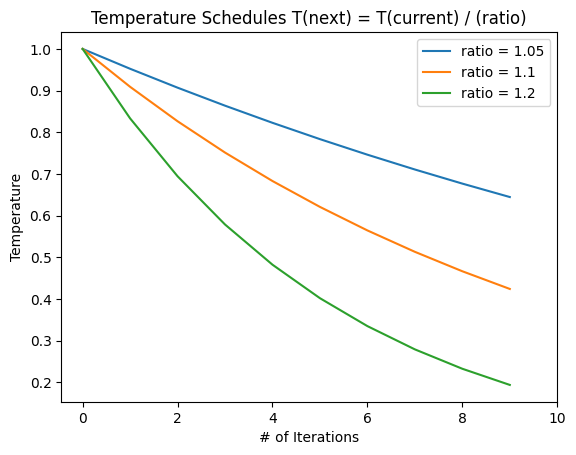

In [147]:
ratio_1 = 1.05
temp_1 = create_temperature_schedule(temp_schedule_start, ratio_1, iteration_count)

ratio_2 = 1.1
temp_2 = create_temperature_schedule(temp_schedule_start, ratio_2, iteration_count)

ratio_3 = 1.2
temp_3 = create_temperature_schedule(temp_schedule_start, ratio_3, iteration_count)

iterations = np.arange(0, iteration_count, 1)

plt.plot(iterations, temp_1, label='ratio = 1.05')
plt.plot(iterations, temp_2, label='ratio = 1.1')
plt.plot(iterations, temp_3, label='ratio = 1.2')

plt.title("Temperature Schedules T(next) = T(current) / (ratio)")
plt.xlabel("# of Iterations")
plt.xticks(np.arange(0, iteration_count + 1, iteration_count // 4))
plt.ylabel("Temperature")
plt.legend()
plt.show()

####**Visualize Delta E (change in energy)**

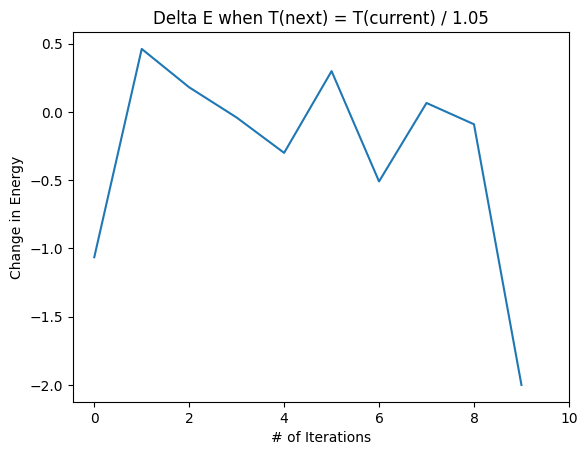

In [242]:
iterations = np.arange(0, iteration_count, 1)

plt.plot(iterations, delta_E)
plt.title("Delta E when T(next) = T(current) / 1.05")
plt.xlabel("# of Iterations")
plt.xticks(np.arange(0, iteration_count + 1, iteration_count // 4))
plt.ylabel("Change in Energy")
plt.show()

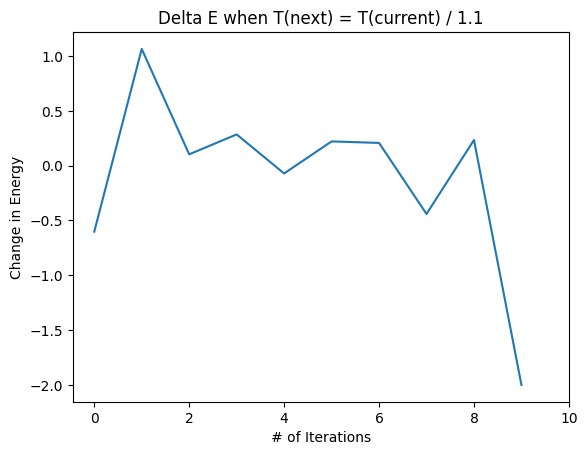

In [149]:
iterations = np.arange(0, iteration_count, 1)

plt.plot(iterations, delta_E)
plt.title("Delta E when T(next) = T(current) / 1.1")
plt.xlabel("# of Iterations")
plt.xticks(np.arange(0, iteration_count + 1, iteration_count // 4))
plt.ylabel("Change in Energy")
plt.show()

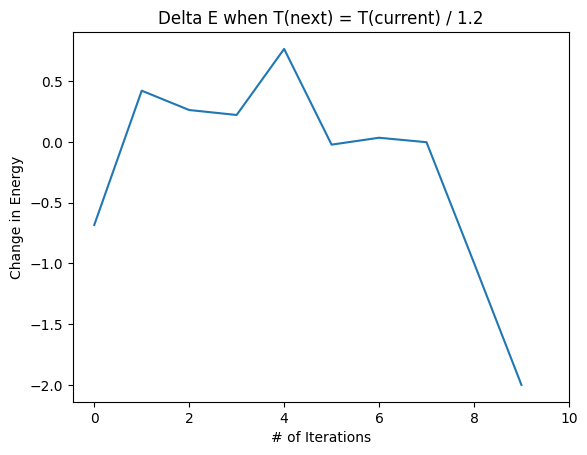

In [181]:
iterations = np.arange(0, iteration_count, 1)

plt.plot(iterations, delta_E)
plt.title("Delta E when T(next) = T(current) / 1.2")
plt.xlabel("# of Iterations")
plt.xticks(np.arange(0, iteration_count + 1, iteration_count // 4))
plt.ylabel("Change in Energy")
plt.show()

####**Visualize the objective function**

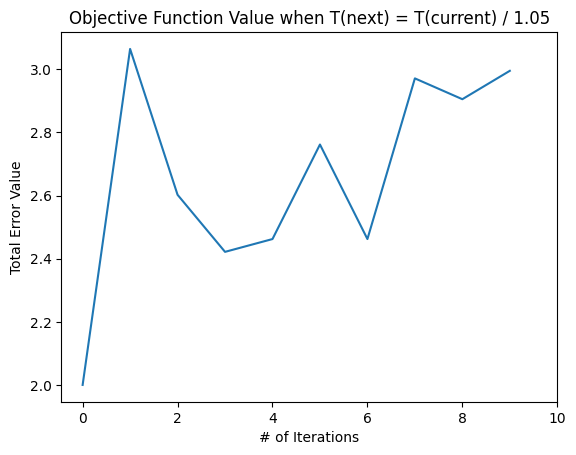

In [243]:
iterations = np.arange(0, iteration_count, 1)

plt.plot(iterations, error_values)
plt.title("Objective Function Value when T(next) = T(current) / 1.05")
plt.xlabel("# of Iterations")
plt.xticks(np.arange(0, iteration_count + 1, iteration_count // 4))
plt.ylabel("Total Error Value")
plt.show()

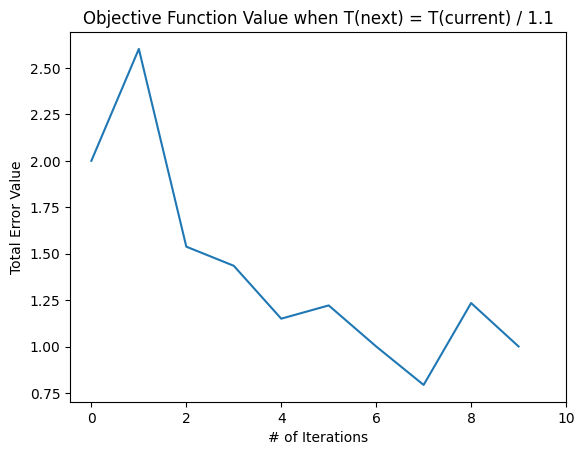

In [152]:
iterations = np.arange(0, iteration_count, 1)

plt.plot(iterations, error_values)
plt.title("Objective Function Value when T(next) = T(current) / 1.1")
plt.xlabel("# of Iterations")
plt.xticks(np.arange(0, iteration_count + 1, iteration_count // 4))
plt.ylabel("Total Error Value")
plt.show()

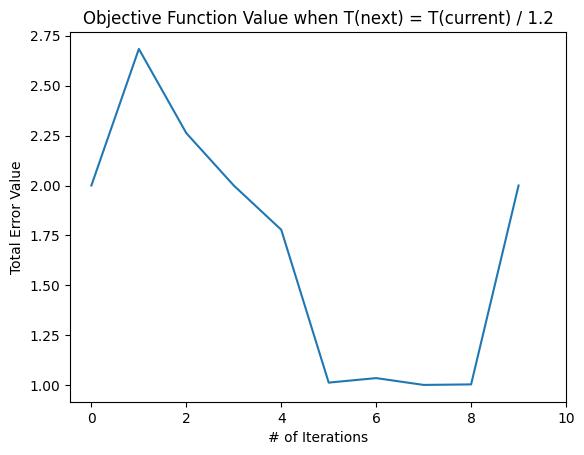

In [182]:
iterations = np.arange(0, iteration_count, 1)

plt.plot(iterations, error_values)
plt.title("Objective Function Value when T(next) = T(current) / 1.2")
plt.xlabel("# of Iterations")
plt.xticks(np.arange(0, iteration_count + 1, iteration_count // 4))
plt.ylabel("Total Error Value")
plt.show()

####**Explain the 3 temperature schedules' effects on the algorithm's optimization**

To analyze the thre temperature schedules:
>1.) **T(next) = T(current) / 1.05**

>2.) **T(next) = T(current) / 1.1**

>3.) **T(next) = T(current) / 1.2**

It is important to pay attention to the three numbers in each equation's denominators, **1.05**, **1.1**, and **1.2**, which are referred to as *ratios*. Evidently, the temperature schedule monotonically decreases as a faster rate as the denominator contains a higher number. The temperature schedule's **ratio** shares an *inverse relationship* with its **values**.

The schedule with **1.05** in the denominator caused an *increase* in the objective function's values throughout 10 iterations. Delta E, the change in energy, did not have a monotonic relationship-- it *decreased* then *increased* again throughout the algorithm's execution while consistently producing negative values. Therefore, the **T(next) = T(current) / 1.05** temperature schedule produced undesirable results.

The best performing temperature schedule contained a ratio of **1.1**. Delta E appeared to remain *very consistent* throughout the algorithm's execution. Also, the values of the objective function consistently *decreased*. This observation dictates that the **T(next) = T(current) / 1.1** temperature schedule is a suitable fit for simulated annealing problems.

The temperature schedule with a ratio of **1.2** encountered a *rapid fluctuation* of values for delta E, but they mostly remained positive. However, the objective function's values sharply increased from 2.0 to around 3.0, although it dropped back down to 2.0 towards the end of the algorithm's run. Although the **T(next) = T(current) / 1.2** schedule appears to work more proficiently than one with a ratio of **1.05**, it is subpar compared to the **T(next) = T(current) / 1.1** temperature schedule.